In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install kaggle


In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
from google.colab import files


In [7]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shamisomakainganwa","key":"45cb37c3c6529ab8240ac933393f10ab"}'}

In [8]:
!kaggle datasets download adityajn105/flickr8k --unzip

 99% 1.02G/1.04G [00:13<00:00, 125MB/s]
100% 1.04G/1.04G [00:13<00:00, 80.5MB/s]


#Loading dataset

In [9]:
import os

#the path to the folder
image_path = '/content/Images'

#all files
images_list = os.listdir(image_path)

for images in images_list:
    print(images)

Streaming output truncated to the last 5000 lines.
3051125715_db76cebd1e.jpg
3097171315_0ba7d283b1.jpg
3711611500_ea47b58b6f.jpg
2816259113_461f8dedb0.jpg
1339596997_8ac29c1841.jpg
2465497494_43d74df57c.jpg
241347271_a39a5a0070.jpg
2102732029_9ae520914d.jpg
3362592729_893e26b806.jpg
1965278563_8279e408de.jpg
3492383096_5bbc08f0da.jpg
3308997740_91765ecdcc.jpg
3330019493_fd36fbc2ea.jpg
1478268555_7e301fc510.jpg
3401333624_4b6af8c1d7.jpg
2100816230_ff866fb352.jpg
3703960010_1e4c922a25.jpg
345684566_235e8dfcc1.jpg
987907964_5a06a63609.jpg
3571147934_d1c8af1d6e.jpg
519061891_320061864e.jpg
3737539561_d1dc161040.jpg
2600883097_aca38cc146.jpg
2780105274_52360c4cca.jpg
1510669311_75330b4781.jpg
2095435987_1b7591d214.jpg
3264337159_e1680a35ba.jpg
3027397797_4f1d305ced.jpg
3182996527_70d9c323d5.jpg
3016606751_0e8be20abd.jpg
3249865395_dceaa59f54.jpg
1562392511_522a26063b.jpg
1317292658_ba29330a0b.jpg
3029043380_b28644ea5d.jpg
2911245290_b2c79f328a.jpg
1775029934_e1e96038a8.jpg
3349307529_c1a516

In [10]:
#path of the .txt file
caption_path = '/content/captions.txt'

with open(caption_path, 'r') as file:
    contents = file.read()

print(contents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Preprocessing

In [11]:
from PIL import Image

# Folder path
image_path = '/content/Images'

# List of images in the folder
images_list = os.listdir(image_path)

# Preprocessing each image
for image_file in images_list:
    image_file_path = os.path.join(image_path, image_file)
    image = Image.open(image_file_path)
    #resizing to (224,224)
    target_size = (224, 224)
    image = image.resize(target_size)


    preprocessed_image_path = os.path.join(image_path, 'preprocessed_' + image_file)
    image.save(preprocessed_image_path)
    print("Preprocessed image:", preprocessed_image_path)


Streaming output truncated to the last 5000 lines.
Preprocessed image: /content/Images/preprocessed_3051125715_db76cebd1e.jpg
Preprocessed image: /content/Images/preprocessed_3097171315_0ba7d283b1.jpg
Preprocessed image: /content/Images/preprocessed_3711611500_ea47b58b6f.jpg
Preprocessed image: /content/Images/preprocessed_2816259113_461f8dedb0.jpg
Preprocessed image: /content/Images/preprocessed_1339596997_8ac29c1841.jpg
Preprocessed image: /content/Images/preprocessed_2465497494_43d74df57c.jpg
Preprocessed image: /content/Images/preprocessed_241347271_a39a5a0070.jpg
Preprocessed image: /content/Images/preprocessed_2102732029_9ae520914d.jpg
Preprocessed image: /content/Images/preprocessed_3362592729_893e26b806.jpg
Preprocessed image: /content/Images/preprocessed_1965278563_8279e408de.jpg
Preprocessed image: /content/Images/preprocessed_3492383096_5bbc08f0da.jpg
Preprocessed image: /content/Images/preprocessed_3308997740_91765ecdcc.jpg
Preprocessed image: /content/Images/preprocessed_3

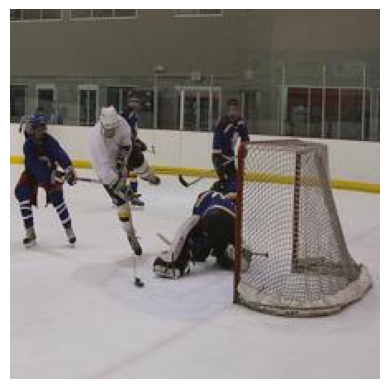

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming you have the file path of the preprocessed image
image_path = '/content/Images/preprocessed_2959941749_fa99097463.jpg'

# Load the image using matplotlib
preprocessed_image = mpimg.imread(image_path)

# Display the image
plt.imshow(preprocessed_image)
plt.axis('off')
plt.show()

In [13]:
#loading the libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#cleaning text
captions='/content/captions.txt'
with open(captions, 'r') as f:
    contents = f.read()

    import re
contents = re.sub(' +', ' ', contents)
contents = contents.lower()
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
contents = ' '.join(word for word in contents.split() if word not in stopwords)

In [15]:
with open('cleaned_file.txt', 'w') as f:
    f.write(contents)

In [16]:
print(contents)

image,caption 1000268201_693b08cb0e.jpg,a child pink dress climbing set stairs entry way . 1000268201_693b08cb0e.jpg,a girl going wooden building . 1000268201_693b08cb0e.jpg,a little girl climbing wooden playhouse . 1000268201_693b08cb0e.jpg,a little girl climbing stairs playhouse . 1000268201_693b08cb0e.jpg,a little girl pink dress going wooden cabin . 1001773457_577c3a7d70.jpg,a black dog spotted dog fighting 1001773457_577c3a7d70.jpg,a black dog tri-colored dog playing road . 1001773457_577c3a7d70.jpg,a black dog white dog brown spots staring street . 1001773457_577c3a7d70.jpg,two dogs different breeds looking road . 1001773457_577c3a7d70.jpg,two dogs pavement moving toward . 1002674143_1b742ab4b8.jpg,a little girl covered paint sits front painted rainbow hands bowl . 1002674143_1b742ab4b8.jpg,a little girl sitting front large painted rainbow . 1002674143_1b742ab4b8.jpg,a small girl grass plays fingerpaints front white canvas rainbow . 1002674143_1b742ab4b8.jpg,there girl pigtails s

In [17]:
!pip install gensim

In [18]:
import gensim
from gensim.models import Word2Vec
# Train word2vec model with gensim
sentences = [sentence.split() for sentence in caption_path.split('.')]
model_gensim = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model_gensim.save("word2vec.model")

#Encoder-Decoder Model

In [19]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import to_categorical

# Path of the .txt file containing captions
caption_path = '/content/captions.txt'
# Load the .txt file
with open(caption_path, 'r') as file:
    # Read and print each line of the file
    for line in file:
        print(line.strip())

Streaming output truncated to the last 5000 lines.
3364715316_df8c20bac1.jpg,Two people play on the beach .
3364715316_df8c20bac1.jpg,Two women are playing a racquet game on the beach .
3364715316_df8c20bac1.jpg,Two women in bathing suits play on the beach .
3364715316_df8c20bac1.jpg,Two women in bikinis play on the beach .
3364715316_df8c20bac1.jpg,Two women on a beach .
3364796213_b8948913b5.jpg,A crowd of joyful people parade through an Asian street with black banners .
3364796213_b8948913b5.jpg,A crowd of people carrying flags bike and walk through the streets .
3364796213_b8948913b5.jpg,A group of people riding double on bicycles carrying black flags .
3364796213_b8948913b5.jpg,Asian people are riding bike and holding up banners in a parade .
3364796213_b8948913b5.jpg,People ride bikes and carry black flags along a road where others are gathered .
3364797223_1f0b2f98ed.jpg,A group of Asian teenagers are holding flags on a street .
3364797223_1f0b2f98ed.jpg,A group of happy young m

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
# Preprocess the data
X_sequence = np.random.rand(100, 10)
X_image = np.random.rand(100, 4096)
y = np.random.randint(0, 5, size=(100,))

# Convert target labels to one-hot encoding
y = to_categorical(y)

# Define the architecture
sequence_length = X_sequence.shape[1]
vocab_size = 10000
embedding_dim = 100
lstm_units = 128
dense_units = 64
num_classes = y.shape[1]

In [21]:
# Sequence input
sequence_input = Input(shape=(sequence_length,))
embedded_sequence = Embedding(vocab_size, embedding_dim)(sequence_input)
lstm_output = LSTM(lstm_units)(embedded_sequence)

# Image input
image_input = Input(shape=(4096,))
image_dense = Dense(dense_units)(image_input)

# Merge sequence and image features
merged = concatenate([lstm_output, image_dense])

# Classification layers
hidden_dense = Dense(dense_units, activation='relu')(merged)
output = Dense(num_classes, activation='softmax')(hidden_dense)

# Create the model
model = Model(inputs=[sequence_input, image_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_sequence, X_image], y, epochs=10, batch_size=32)

# Save the trained model
model.save('encoder_decoder_model.h5')

Epoch 1/10
4/4 [==============================] - 12s 46ms/step - loss: 2.0089 - accuracy: 0.1800
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 1.8171 - accuracy: 0.2900
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 1.6178 - accuracy: 0.3200
Epoch 4/10
4/4 [==============================] - 0s 31ms/step - loss: 1.5548 - accuracy: 0.3500
Epoch 5/10
4/4 [==============================] - 0s 41ms/step - loss: 1.4815 - accuracy: 0.2600
Epoch 6/10
4/4 [==============================] - 0s 33ms/step - loss: 1.4709 - accuracy: 0.2700
Epoch 7/10
4/4 [==============================] - 0s 32ms/step - loss: 1.2442 - accuracy: 0.4300
Epoch 8/10
4/4 [==============================] - 0s 30ms/step - loss: 1.0067 - accuracy: 0.6500
Epoch 9/10
4/4 [==============================] - 0s 30ms/step - loss: 0.8780 - accuracy: 0.7700
Epoch 10/10
4/4 [==============================] - 0s 33ms/step - loss: 0.7758 - accuracy: 0.7300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 10, 100)              1000000   ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128)                  117248    ['embedding[0][0]']           
                                                                                              

In [23]:
#saving model
model.save('encoder_decoder_model.h5')

In [24]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#Load the model and tokenizer
model=load_model('encoder_decoder_model.h5')

In [25]:
!pip install torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00


In [26]:
from PIL import Image

image_path = '/content/Images/preprocessed_2959941749_fa99097463.jpg'

# Open the image
image = Image.open(image_path)

# Get the pixel values
pixel_values = image.getdata()

# Print the pixel values
print(list(pixel_values))

[(65, 61, 60), (78, 74, 73), (77, 73, 70), (65, 61, 58), (53, 50, 45), (47, 44, 39), (65, 62, 55), (97, 94, 87), (61, 58, 49), (66, 63, 54), (69, 67, 55), (67, 65, 53), (67, 65, 53), (69, 67, 55), (71, 69, 56), (69, 67, 54), (64, 62, 49), (63, 61, 48), (91, 89, 76), (85, 83, 70), (62, 60, 47), (68, 66, 53), (70, 68, 55), (69, 67, 54), (71, 69, 56), (70, 68, 55), (68, 66, 53), (72, 70, 57), (73, 71, 58), (67, 65, 52), (80, 78, 65), (111, 109, 96), (90, 88, 75), (91, 89, 76), (97, 95, 82), (91, 89, 76), (105, 103, 90), (83, 81, 68), (79, 77, 64), (80, 78, 65), (76, 74, 61), (78, 76, 63), (80, 78, 65), (82, 80, 67), (81, 79, 66), (79, 77, 64), (76, 74, 61), (73, 71, 58), (71, 69, 56), (110, 108, 95), (68, 66, 53), (74, 72, 59), (72, 70, 57), (70, 68, 55), (75, 73, 60), (65, 63, 50), (68, 66, 53), (68, 66, 53), (63, 61, 48), (68, 66, 53), (66, 64, 51), (63, 61, 48), (114, 112, 99), (77, 75, 62), (66, 62, 50), (67, 63, 51), (68, 64, 52), (69, 65, 53), (70, 66, 54), (71, 67, 55), (72, 68, 56

#Evaluation

In [27]:
#Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

X_seq_train, X_seq_test, X_img_train, X_img_test, y_train, y_test = train_test_split(X_sequence, X_image, y, test_size=0.2, random_state=42)

In [28]:
#Evaluate the model on the testing set using optimal metrics
_, accuracy = model.evaluate([X_seq_test, X_img_test], y_test)
print("Accuracy:", accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.6612 - accuracy: 0.9000
Accuracy: 0.8999999761581421


In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy before regularization: {accuracy}')


model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy after regularization: {accuracy}')

NameError: ignored